In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data_ = pd.read_excel('online_retail_II.xlsx', sheet_name=None, dtype={'Description': str})

In [3]:
data = pd.concat(data_.values(), ignore_index=True)
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [4]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])


In [5]:
data["InvoiceDate"]

0         2009-12-01 07:45:00
1         2009-12-01 07:45:00
2         2009-12-01 07:45:00
3         2009-12-01 07:45:00
4         2009-12-01 07:45:00
                  ...        
1067366   2011-12-09 12:50:00
1067367   2011-12-09 12:50:00
1067368   2011-12-09 12:50:00
1067369   2011-12-09 12:50:00
1067370   2011-12-09 12:50:00
Name: InvoiceDate, Length: 1067371, dtype: datetime64[ns]

In [6]:
# drop rows with quantity less than 0
data = data[data['Quantity'] > 0]

In [7]:
data.Description = data.Description.apply(lambda x: x.strip() if isinstance(x, str) else x)

/var/folders/2l/6qvskg9d6kdfb213n4__1f200000gn/T/ipykernel_4838/2612007499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Description = data.Description.apply(lambda x: x.strip() if isinstance(x, str) else x)


In [8]:
data[(data["Description"] == "10 COLOUR SPACEBOY PEN") & (data["Quantity"] > 250)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
824440,563076,22418,10 COLOUR SPACEBOY PEN,288,2011-08-11 16:12:00,0.72,14646.0,Netherlands


In [9]:
data.groupby("Description").filter(lambda x: x["InvoiceDate"].max() >= pd.to_datetime("2011-12-09") and x["InvoiceDate"].min() <= pd.to_datetime("2010-01-01") and x["InvoiceDate"].count() > 730)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
13,489436,21755,LOVE BUILDING BLOCK WORD,18,2009-12-01 09:06:00,5.45,13078.0,United Kingdom
14,489436,21754,HOME BUILDING BLOCK WORD,3,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
15,489436,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2009-12-01 09:06:00,1.69,13078.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067338,581585,22113,GREY HEART HOT WATER BOTTLE,4,2011-12-09 12:31:00,4.25,15804.0,United Kingdom
1067343,581585,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-12-09 12:31:00,0.42,15804.0,United Kingdom
1067344,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,2011-12-09 12:31:00,0.42,15804.0,United Kingdom
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [10]:
data[data["Description"] == 'RECORD FRAME 7" SINGLE SIZE']["InvoiceDate"].min()

Timestamp('2009-12-01 07:45:00')

In [11]:
data[data["Description"] == "10 COLOUR SPACEBOY PEN"]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
187240,507193,22418,10 COLOUR SPACEBOY PEN,144,2010-05-06 16:21:00,0.72,16843.0,United Kingdom
187314,507206,22418,10 COLOUR SPACEBOY PEN,24,2010-05-06 16:50:00,0.85,13870.0,United Kingdom
187601,507223,22418,10 COLOUR SPACEBOY PEN,12,2010-05-06 19:29:00,0.85,17323.0,United Kingdom
188431,507282,22418,10 COLOUR SPACEBOY PEN,24,2010-05-07 13:31:00,0.85,13089.0,United Kingdom
188470,507288,22418,10 COLOUR SPACEBOY PEN,12,2010-05-07 13:58:00,0.85,17609.0,United Kingdom
...,...,...,...,...,...,...,...,...
1060759,581196,22418,10 COLOUR SPACEBOY PEN,48,2011-12-07 17:25:00,0.85,12935.0,United Kingdom
1061062,581217,22418,10 COLOUR SPACEBOY PEN,2,2011-12-08 09:20:00,1.63,NaN,United Kingdom
1062602,581238,22418,10 COLOUR SPACEBOY PEN,1,2011-12-08 10:53:00,2.46,NaN,United Kingdom
1065050,581439,22418,10 COLOUR SPACEBOY PEN,2,2011-12-08 16:30:00,1.63,NaN,United Kingdom


In [12]:
data.groupby("Description").count().index               

Index(['*Boombox Ipod Classic', '*USB Office Glitter Lamp',
       '*USB Office Mirror Ball', '10 COLOUR SPACEBOY PEN',
       '11 PC CERAMIC TEA SET POLKADOT', '12 ASS ZINC CHRISTMAS DECORATIONS',
       '12 COLOURED PARTY BALLOONS', '12 DAISY PEGS IN WOOD BOX',
       '12 EGG HOUSE PAINTED WOOD', '12 HANGING EGGS HAND PAINTED',
       ...
       'tk maxx mix up with pink', 'to push order througha s stock was',
       'update', 'website fixed', 'wrong invc', 'wrongly coded 20713',
       'wrongly coded 23343', 'wrongly marked', 'wrongly marked 23343',
       'wrongly sold (22719) barcode'],
      dtype='object', name='Description', length=5426)

In [13]:
data[data["Description"] == '*USB Office Glitter Lamp']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1898,489597,20739,*USB Office Glitter Lamp,1,2009-12-01 14:28:00,8.65,NaN,United Kingdom


<Axes: xlabel='InvoiceDate'>

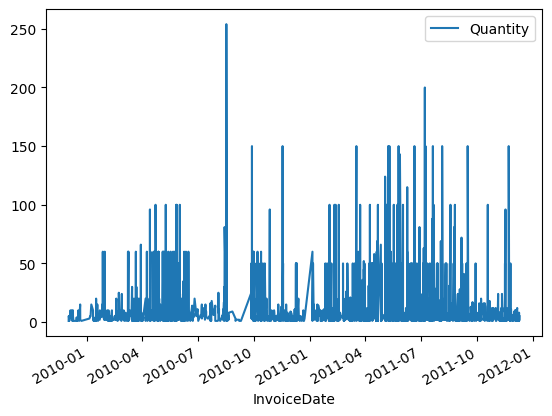

In [14]:
data[data["Description"] == 'PARTY BUNTING'].plot(x='InvoiceDate', y='Quantity', kind='line')

In [15]:
data[data["Description"] == "RED WOOLLY HOTTIE WHITE HEART."].set_index("InvoiceDate").resample('D')["Quantity"].sum()

InvoiceDate
2009-12-01     50
2009-12-02    245
2009-12-03     78
2009-12-04     74
2009-12-05      0
             ... 
2011-12-05     41
2011-12-06     12
2011-12-07     55
2011-12-08     27
2011-12-09     12
Freq: D, Name: Quantity, Length: 739, dtype: int64

In [16]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [17]:
data.shape

(1044421, 8)

In [18]:
filtered_data = data.groupby("Description").filter(lambda x: x["InvoiceDate"].max() >= pd.to_datetime("2011-12-09") and x["InvoiceDate"].min() <= pd.to_datetime("2010-01-01") and x["InvoiceDate"].count() > 730)
filtered_data.drop(columns=["Invoice", "StockCode", "Price", "Customer ID", "Country"], inplace=True)
filtered_data[filtered_data["Description"] == "12 PENCILS SMALL TUBE SKULL"]

,Description,Quantity,InvoiceDate
1174,12 PENCILS SMALL TUBE SKULL,3,2009-12-01 12:47:00
1924,12 PENCILS SMALL TUBE SKULL,1,2009-12-01 14:28:00
3789,12 PENCILS SMALL TUBE SKULL,3,2009-12-02 11:52:00
4316,12 PENCILS SMALL TUBE SKULL,1,2009-12-02 12:43:00
4511,12 PENCILS SMALL TUBE SKULL,3,2009-12-02 13:20:00
...,...,...,...
989636,12 PENCILS SMALL TUBE SKULL,4,2011-11-13 16:22:00
1014365,12 PENCILS SMALL TUBE SKULL,1,2011-11-22 11:18:00
1059885,12 PENCILS SMALL TUBE SKULL,8,2011-12-07 13:53:00
1063439,12 PENCILS SMALL TUBE SKULL,3,2011-12-08 12:50:00


In [19]:
filtered_data[filtered_data["Description"] == "GREY HEART HOT WATER BOTTLE"]

,Description,Quantity,InvoiceDate
476,GREY HEART HOT WATER BOTTLE,4,2009-12-01 11:45:00
750,GREY HEART HOT WATER BOTTLE,2,2009-12-01 12:13:00
971,GREY HEART HOT WATER BOTTLE,1,2009-12-01 12:22:00
1312,GREY HEART HOT WATER BOTTLE,8,2009-12-01 12:57:00
1386,GREY HEART HOT WATER BOTTLE,4,2009-12-01 13:19:00
...,...,...,...
1063708,GREY HEART HOT WATER BOTTLE,4,2011-12-08 13:46:00
1063893,GREY HEART HOT WATER BOTTLE,4,2011-12-08 13:50:00
1063972,GREY HEART HOT WATER BOTTLE,1,2011-12-08 13:59:00
1064508,GREY HEART HOT WATER BOTTLE,4,2011-12-08 15:36:00


In [20]:
filtered_data[filtered_data["Description"] == "GREY HEART HOT WATER BOTTLE"].set_index("InvoiceDate").resample('D')["Quantity"].sum().replace(0, None).isna().sum()

np.int64(474)

In [21]:
filtered_data.set_index("InvoiceDate").resample('D')["Quantity"].sum()

InvoiceDate
2009-12-01    5102
2009-12-02    6350
2009-12-03    8785
2009-12-04    3809
2009-12-05     721
              ... 
2011-12-05    4800
2011-12-06    3555
2011-12-07    4234
2011-12-08    4068
2011-12-09    1679
Freq: D, Name: Quantity, Length: 739, dtype: int64

In [22]:
filtered_data[filtered_data["InvoiceDate"].between(pd.to_datetime("2011-12-09 00:00:00"), pd.to_datetime("2011-12-09 23:59:59"), inclusive="both")]["Quantity"].sum()

np.int64(1679)

In [23]:
for desc in filtered_data["Description"].unique():
    desc_data = filtered_data[filtered_data["Description"] == desc]
    missing_days = desc_data.set_index("InvoiceDate").resample('D')["Quantity"].sum().replace(0, None).isna().sum()
    if missing_days < 200:
        print(f"{desc} has {missing_days} missing days")

LOVE BUILDING BLOCK WORD has 191 missing days
HOME BUILDING BLOCK WORD has 167 missing days
ASSORTED COLOUR BIRD ORNAMENT has 157 missing days
VINTAGE SNAP CARDS has 179 missing days
BATHROOM METAL SIGN has 193 missing days
VICTORIAN GLASS HANGING T-LIGHT has 179 missing days
LUNCH BAG CARS BLUE has 167 missing days
LUNCH BAG WOODLAND has 169 missing days
PACK OF 60 PINK PAISLEY CAKE CASES has 174 missing days
60 TEATIME FAIRY CAKE CASES has 180 missing days
JUMBO STORAGE BAG SUKI has 160 missing days
LUNCH BAG  BLACK SKULL. has 160 missing days
JUMBO  BAG BAROQUE BLACK WHITE has 179 missing days
PARTY BUNTING has 198 missing days


# Chosen Products

+ VICTORIAN GLASS HANGING T-LIGHT
+ BATHROOM METAL SIGN
+ VINTAGE SNAP CARDS
+ PACK OF 60 PINK PAISLEY CAKE CASES
+ JUMBO STORAGE BAG SUKI

In [24]:
chosen_products = ["VICTORIAN GLASS HANGING T-LIGHT",
"BATHROOM METAL SIGN",
"VINTAGE SNAP CARDS",
"PACK OF 60 PINK PAISLEY CAKE CASES",
"JUMBO STORAGE BAG SUKI"]

final_data = filtered_data[filtered_data["Description"].isin(chosen_products)]
final_data = final_data[["Description", "InvoiceDate", "Quantity"]].reset_index(drop=True)
final_data

,Description,InvoiceDate,Quantity
0,VINTAGE SNAP CARDS,2009-12-01 09:46:00,12
1,BATHROOM METAL SIGN,2009-12-01 09:50:00,12
2,VICTORIAN GLASS HANGING T-LIGHT,2009-12-01 10:06:00,12
3,PACK OF 60 PINK PAISLEY CAKE CASES,2009-12-01 10:46:00,24
4,VINTAGE SNAP CARDS,2009-12-01 11:34:00,4
...,...,...,...
9992,BATHROOM METAL SIGN,2011-12-09 10:26:00,1
9993,VINTAGE SNAP CARDS,2011-12-09 10:51:00,6
9994,JUMBO STORAGE BAG SUKI,2011-12-09 12:19:00,10
9995,VINTAGE SNAP CARDS,2011-12-09 12:20:00,1


<Axes: xlabel='InvoiceDate'>

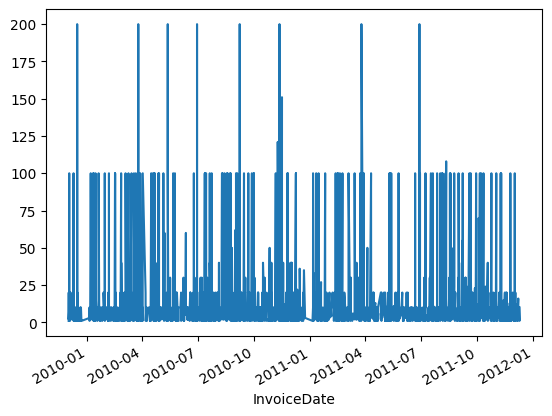

In [25]:
final_data[final_data["Description"] == "JUMBO STORAGE BAG SUKI"].plot(x="InvoiceDate", y="Quantity", kind='line', legend=False)

In [26]:
from utilsforecast.plotting import plot_series

In [ ]:
final_data_copy = final_data.rename(columns={"Description": "unique_id", "InvoiceDate": "ds", "Quantity": "y"})
final_data_copy

,unique_id,ds,y
0,VINTAGE SNAP CARDS,2009-12-01 09:46:00,12
1,BATHROOM METAL SIGN,2009-12-01 09:50:00,12
2,VICTORIAN GLASS HANGING T-LIGHT,2009-12-01 10:06:00,12
3,PACK OF 60 PINK PAISLEY CAKE CASES,2009-12-01 10:46:00,24
4,VINTAGE SNAP CARDS,2009-12-01 11:34:00,4
...,...,...,...
9992,BATHROOM METAL SIGN,2011-12-09 10:26:00,1
9993,VINTAGE SNAP CARDS,2011-12-09 10:51:00,6
9994,JUMBO STORAGE BAG SUKI,2011-12-09 12:19:00,10
9995,VINTAGE SNAP CARDS,2011-12-09 12:20:00,1


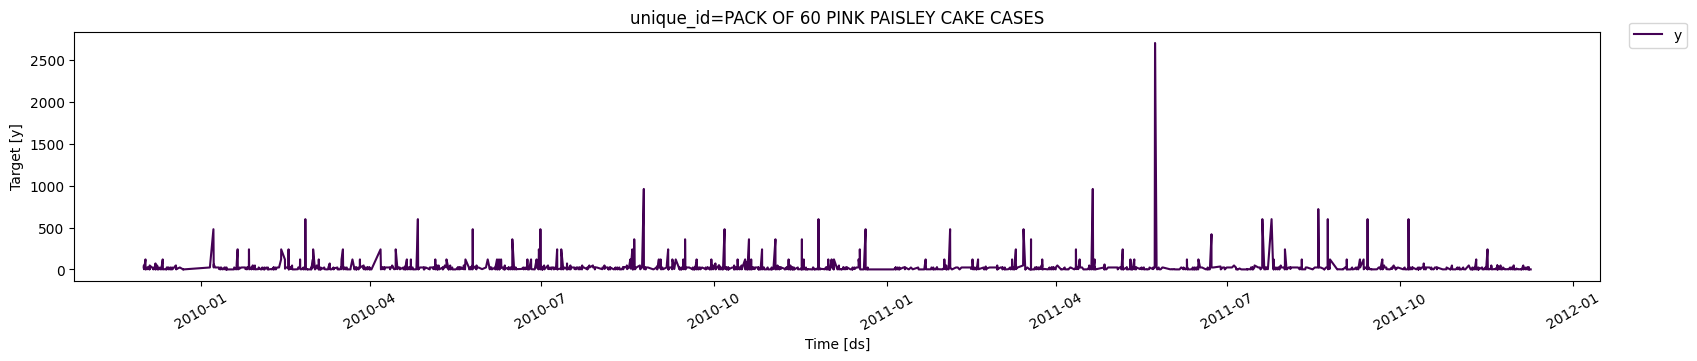

In [28]:
plot_series(df=final_data_copy, ids=["PACK OF 60 PINK PAISLEY CAKE CASES"], palette="viridis")

In [ ]:
temp_data = final_data[final_data["Description"] == "JUMBO STORAGE BAG SUKI"]
temp_data = temp_data.set_index("InvoiceDate").resample('D')["Quantity"].sum().replace(0, None).ffill()
desc_df = pd.DataFrame(["JUMBO STORAGE BAG SUKI"]*temp_data.shape[0], columns=["Description"])
test_data = pd.concat([desc_df, temp_data.reset_index()], axis=1)
test_data

/var/folders/2l/6qvskg9d6kdfb213n4__1f200000gn/T/ipykernel_4838/2325145946.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp_data = temp_data.set_index("InvoiceDate").resample('D')["Quantity"].sum().replace(0, None).ffill()


,Description,InvoiceDate,Quantity
0,JUMBO STORAGE BAG SUKI,2009-12-01,35
1,JUMBO STORAGE BAG SUKI,2009-12-02,128
2,JUMBO STORAGE BAG SUKI,2009-12-03,46
3,JUMBO STORAGE BAG SUKI,2009-12-04,92
4,JUMBO STORAGE BAG SUKI,2009-12-05,92
...,...,...,...
734,JUMBO STORAGE BAG SUKI,2011-12-05,44
735,JUMBO STORAGE BAG SUKI,2011-12-06,47
736,JUMBO STORAGE BAG SUKI,2011-12-07,46
737,JUMBO STORAGE BAG SUKI,2011-12-08,23


In [ ]:
temp_data = final_data[final_data["Description"] == "JUMBO STORAGE BAG SUKI"]
temp_data = temp_data.set_index("InvoiceDate").resample('D')["Quantity"].sum().replace(0, None).ffill()
desc_df = pd.DataFrame(["JUMBO STORAGE BAG SUKI"]*temp_data.shape[0], columns=["Description"])
test_data = pd.concat([desc_df, temp_data.reset_index()], axis=1)
test_data

In [30]:
X = pd.DataFrame()
for product in chosen_products:
    temp_data = final_data[final_data["Description"] == product]
    temp_data = temp_data.set_index("InvoiceDate").resample('D')["Quantity"].sum().replace(0, None).ffill()
    desc_df = pd.DataFrame([product]*temp_data.shape[0], columns=["Description"])
    test_data = pd.concat([desc_df, temp_data.reset_index()], axis=1)
    X = pd.concat([X, test_data], ignore_index=True)
X
X = X.rename(columns={"Description": "unique_id", "InvoiceDate": "ds", "Quantity": "y"})

/var/folders/2l/6qvskg9d6kdfb213n4__1f200000gn/T/ipykernel_4838/861459679.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp_data = temp_data.set_index("InvoiceDate").resample('D')["Quantity"].sum().replace(0, None).ffill()
/var/folders/2l/6qvskg9d6kdfb213n4__1f200000gn/T/ipykernel_4838/861459679.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp_data = temp_data.set_index("InvoiceDate").resample('D')["Quantity"].sum().replace(0, None).ffill()
/var/folders/2l/6qvskg9d6kdfb213n4__1f200000gn/T/ipykernel_4838/861459679.py:4: FutureWarning: Downc

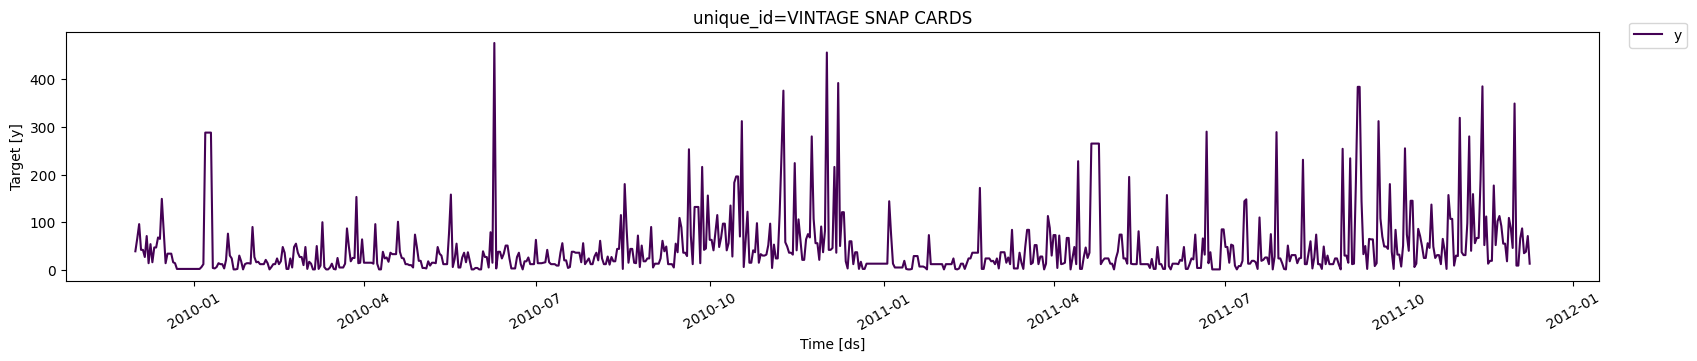

In [31]:
plot_series(df=X, ids=["VINTAGE SNAP CARDS"], palette="viridis")

In [32]:
from statsforecast import StatsForecast
from statsforecast.models import Naive, HistoricAverage, WindowAverage, SeasonalNaive
from utilsforecast.evaluation import evaluate
from utilsforecast.losses import mae
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [33]:
horizon = 7

models = [
    Naive(),
    HistoricAverage(),
    WindowAverage(window_size=horizon),
    SeasonalNaive(season_length=horizon)
]

sf= StatsForecast(models=models, freq='D')
sf.fit(df=X)
preds = sf.predict(h=horizon)

In [34]:
preds.shape

(35, 6)

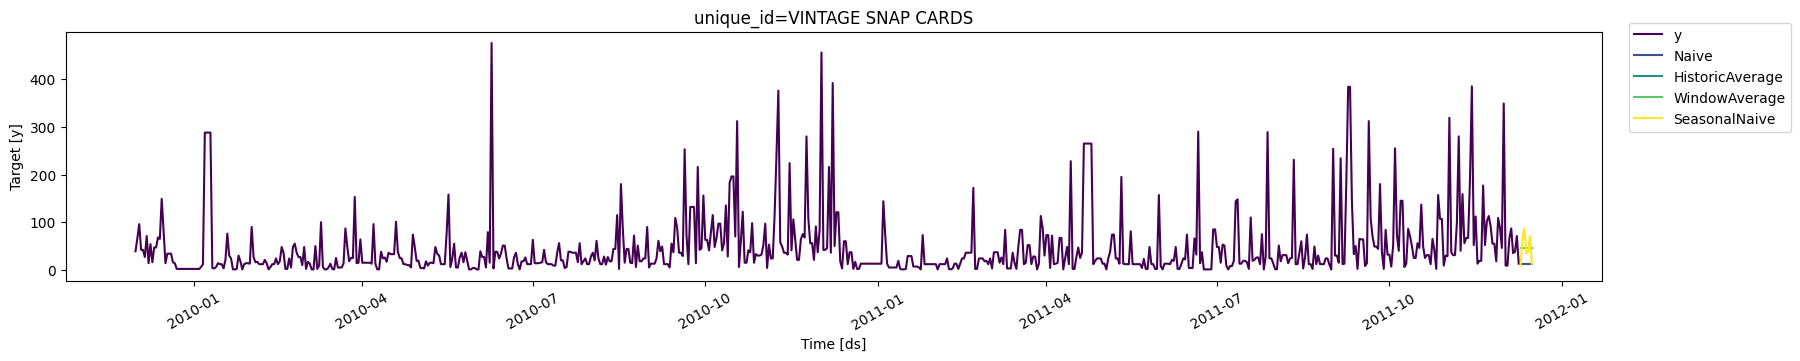

In [35]:
plot_series(df=X, forecasts_df=preds, ids=chosen_products[2:3], palette="viridis")

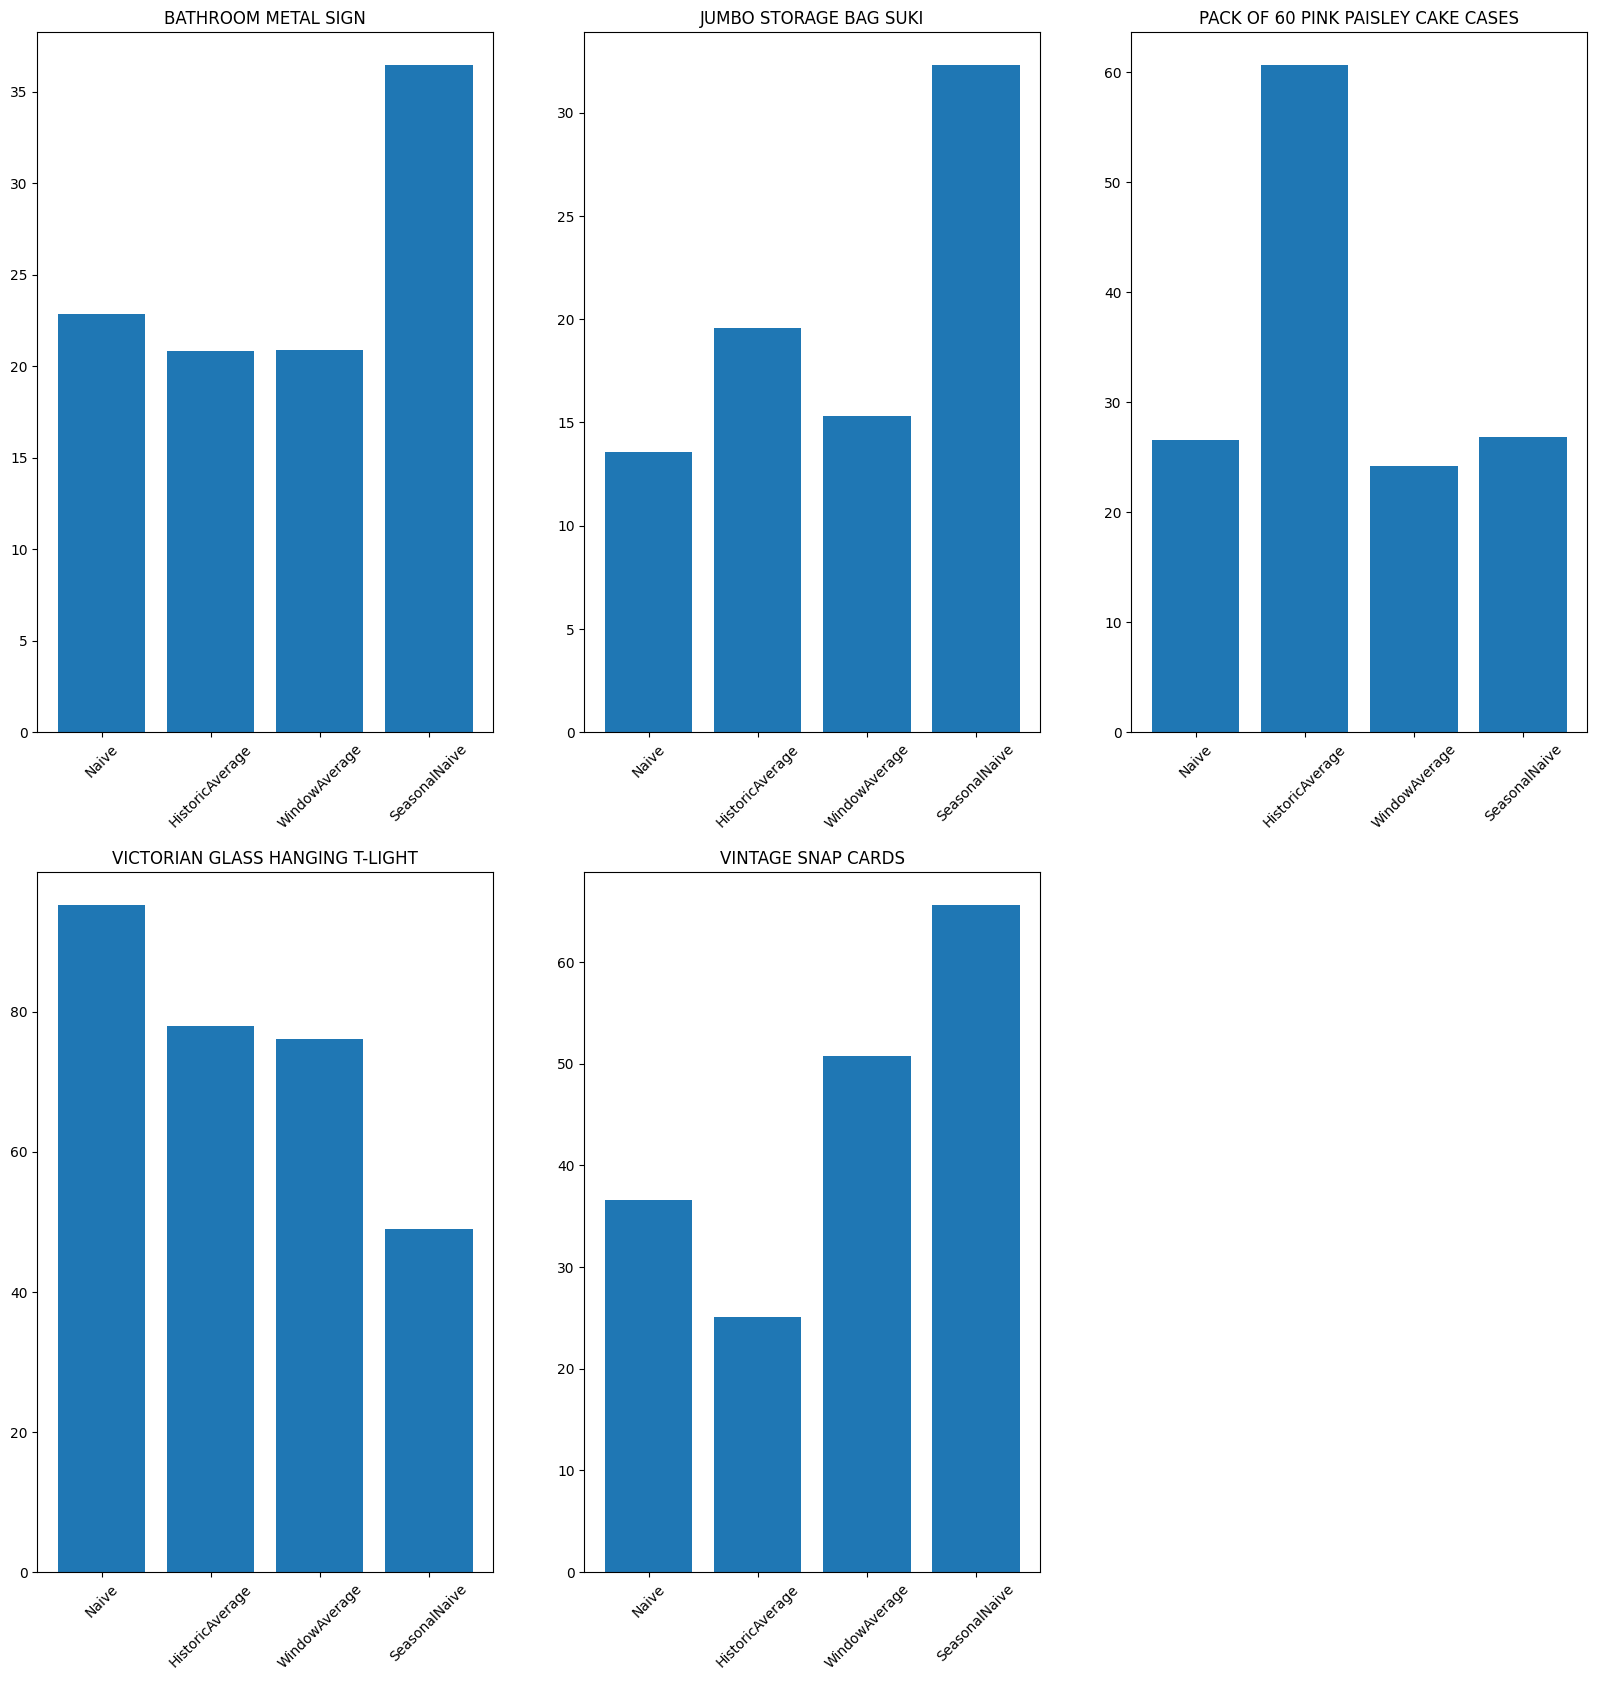

In [36]:
test = X.groupby("unique_id").tail(horizon)
train = X.drop(test.index).reset_index(drop=True)
sf.fit(train)
preds = sf.predict(h=horizon)
evals = pd.merge(test, preds, 'left', ['ds', 'unique_id'])
evalution = evaluate(evals, metrics=[mae])
evalution

plt.figure(figsize=(20,20))

for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.bar(["Naive", "HistoricAverage", "WindowAverage", "SeasonalNaive"], evalution.iloc[i, 2:])
    plt.xticks(rotation=45)
    plt.title(evalution.iloc[i, 0])

plt.show()

In [37]:
evals = evalution.drop(["unique_id"], axis=1).groupby("metric").mean()
evals

,Naive,HistoricAverage,WindowAverage,SeasonalNaive
metric,,,,
mae,38.942857,40.788876,37.42449,42.028571


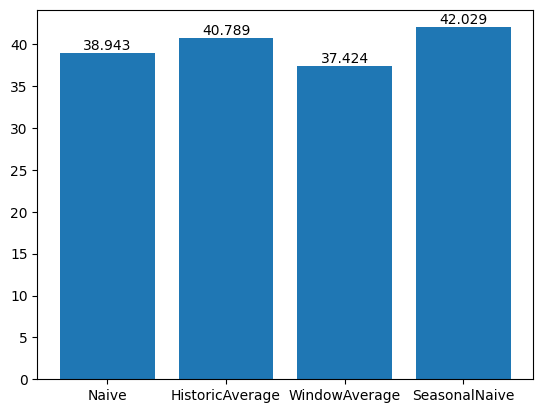

In [38]:
values = evals.loc["mae"].to_list()

bars = plt.bar(["Naive", "HistoricAverage", "WindowAverage", "SeasonalNaive"], evals.loc["mae"])

for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, f'{value:.3f}', ha='center', va="bottom")

plt.show()

# ARIMA

In [39]:
from statsforecast.models import AutoARIMA

In [40]:
# chosen_ids = ["VICTORIAN GLASS HANGING T-LIGHT", "VINTAGE SNAP CARDS"]
chosen_ids = chosen_products

arim_train = train[train["unique_id"].isin(chosen_ids)].reset_index(drop=True)
arim_test = test[test["unique_id"].isin(chosen_ids)].reset_index(drop=True)

models = [
    AutoARIMA(seasonal=False, alias="ARIMA"),
    AutoARIMA(season_length=14, alias="SARIMA")
]

sf = StatsForecast(models=models, freq='D')
sf.fit(df=arim_train)
preds = sf.predict(h=horizon)

evals_df = pd.merge(arim_test, preds, 'inner', ['ds', 'unique_id'])
evaluation_arima = evaluate(evals_df, metrics=[mae])
evaluation_arima

,unique_id,metric,ARIMA,SARIMA
0,BATHROOM METAL SIGN,mae,20.983199,20.983199
1,JUMBO STORAGE BAG SUKI,mae,18.271331,18.271331
2,PACK OF 60 PINK PAISLEY CAKE CASES,mae,60.576699,60.576699
3,VICTORIAN GLASS HANGING T-LIGHT,mae,73.755371,70.926519
4,VINTAGE SNAP CARDS,mae,43.442515,43.442515


In [41]:
evaluation_arima.drop(["unique_id"], axis=1).groupby("metric").mean()

,ARIMA,SARIMA
metric,,
mae,43.405823,42.840053


# TSB, AutoTHETA and AutoTBATS

In [42]:
from statsforecast.models import TSB, AutoTheta, AutoTBATS

In [43]:
# chosen_ids = ["VICTORIAN GLASS HANGING T-LIGHT", "VINTAGE SNAP CARDS"]
chosen_ids = chosen_products

arim_train = train[train["unique_id"].isin(chosen_ids)].reset_index(drop=True)
arim_test = test[test["unique_id"].isin(chosen_ids)].reset_index(drop=True)

models = [
    TSB(0.01, 0.01),
    AutoTheta(season_length=14),
    AutoTBATS(season_length=2)
]

sf = StatsForecast(models=models, freq='D')
sf.fit(df=arim_train)
preds = sf.predict(h=horizon)

evals_df = pd.merge(arim_test, preds, 'inner', ['ds', 'unique_id'])
evaluation = evaluate(evals_df, metrics=[mae])
evaluation

,unique_id,metric,TSB,AutoTheta,AutoTBATS
0,BATHROOM METAL SIGN,mae,20.098227,20.274027,18.039908
1,JUMBO STORAGE BAG SUKI,mae,18.398731,15.779625,14.231564
2,PACK OF 60 PINK PAISLEY CAKE CASES,mae,44.029534,25.999433,22.088151
3,VICTORIAN GLASS HANGING T-LIGHT,mae,74.592114,69.001503,87.520804
4,VINTAGE SNAP CARDS,mae,28.737082,51.692886,24.855786


In [44]:
evals

,Naive,HistoricAverage,WindowAverage,SeasonalNaive
metric,,,,
mae,38.942857,40.788876,37.42449,42.028571


In [45]:
evaluation.drop(["unique_id"], axis=1).groupby("metric").mean()

,TSB,AutoTheta,AutoTBATS
metric,,,
mae,37.171138,36.549495,33.347243


In [46]:
method_comparison = pd.concat([evalution, evaluation_arima.drop(["unique_id", "metric"], axis=1), evaluation.drop(["unique_id", "metric"], axis=1)], axis=1, join='inner')
method_comparison

,unique_id,metric,Naive,HistoricAverage,WindowAverage,SeasonalNaive,ARIMA,SARIMA,TSB,AutoTheta,AutoTBATS
0,BATHROOM METAL SIGN,mae,22.857143,20.840164,20.877551,36.428571,20.983199,20.983199,20.098227,20.274027,18.039908
1,JUMBO STORAGE BAG SUKI,mae,13.571429,19.568306,15.306122,32.285714,18.271331,18.271331,18.398731,15.779625,14.231564
2,PACK OF 60 PINK PAISLEY CAKE CASES,mae,26.571429,60.576699,24.163265,26.857143,60.576699,60.576699,44.029534,25.999433,22.088151
3,VICTORIAN GLASS HANGING T-LIGHT,mae,95.142857,77.892857,76.061225,49.000000,73.755371,70.926519,74.592114,69.001503,87.520804
4,VINTAGE SNAP CARDS,mae,36.571429,25.066354,50.714285,65.571429,43.442515,43.442515,28.737082,51.692886,24.855786


In [47]:
method_comparison_grouped = method_comparison.drop(["unique_id"], axis=1).groupby("metric").mean()

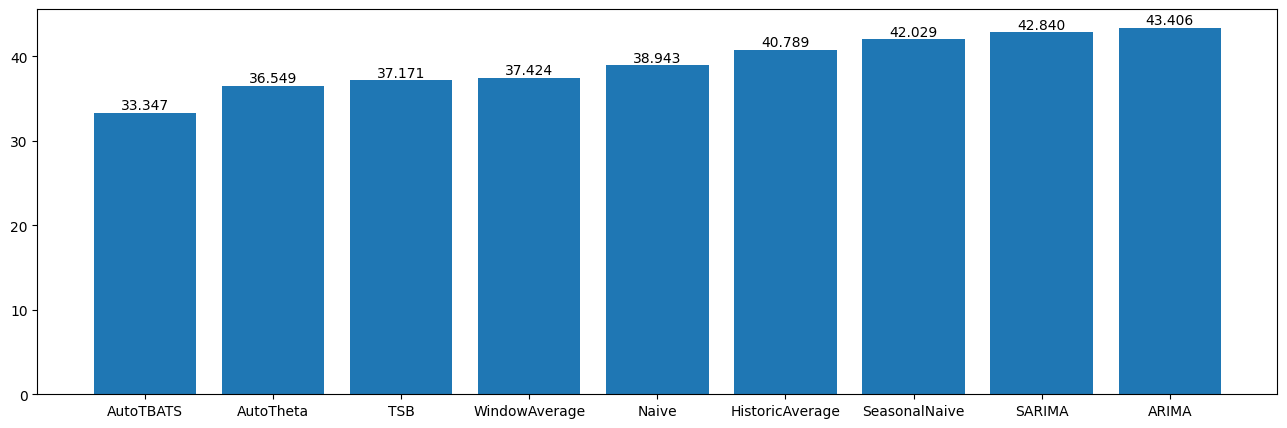

In [48]:
values = method_comparison_grouped.loc["mae"].to_list()
column_names = method_comparison_grouped.columns
zipped_sorted = sorted(zip(column_names, values), key=lambda x: x[1])
unzipped = list(zip(*zipped_sorted))
values = unzipped[1]
column_names = unzipped[0]

plt.figure(figsize=(16, 5))
bars = plt.bar(column_names, values)

for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, f'{value:.3f}', ha='center', va="bottom")

plt.show()

# Exogenous Features

In [51]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


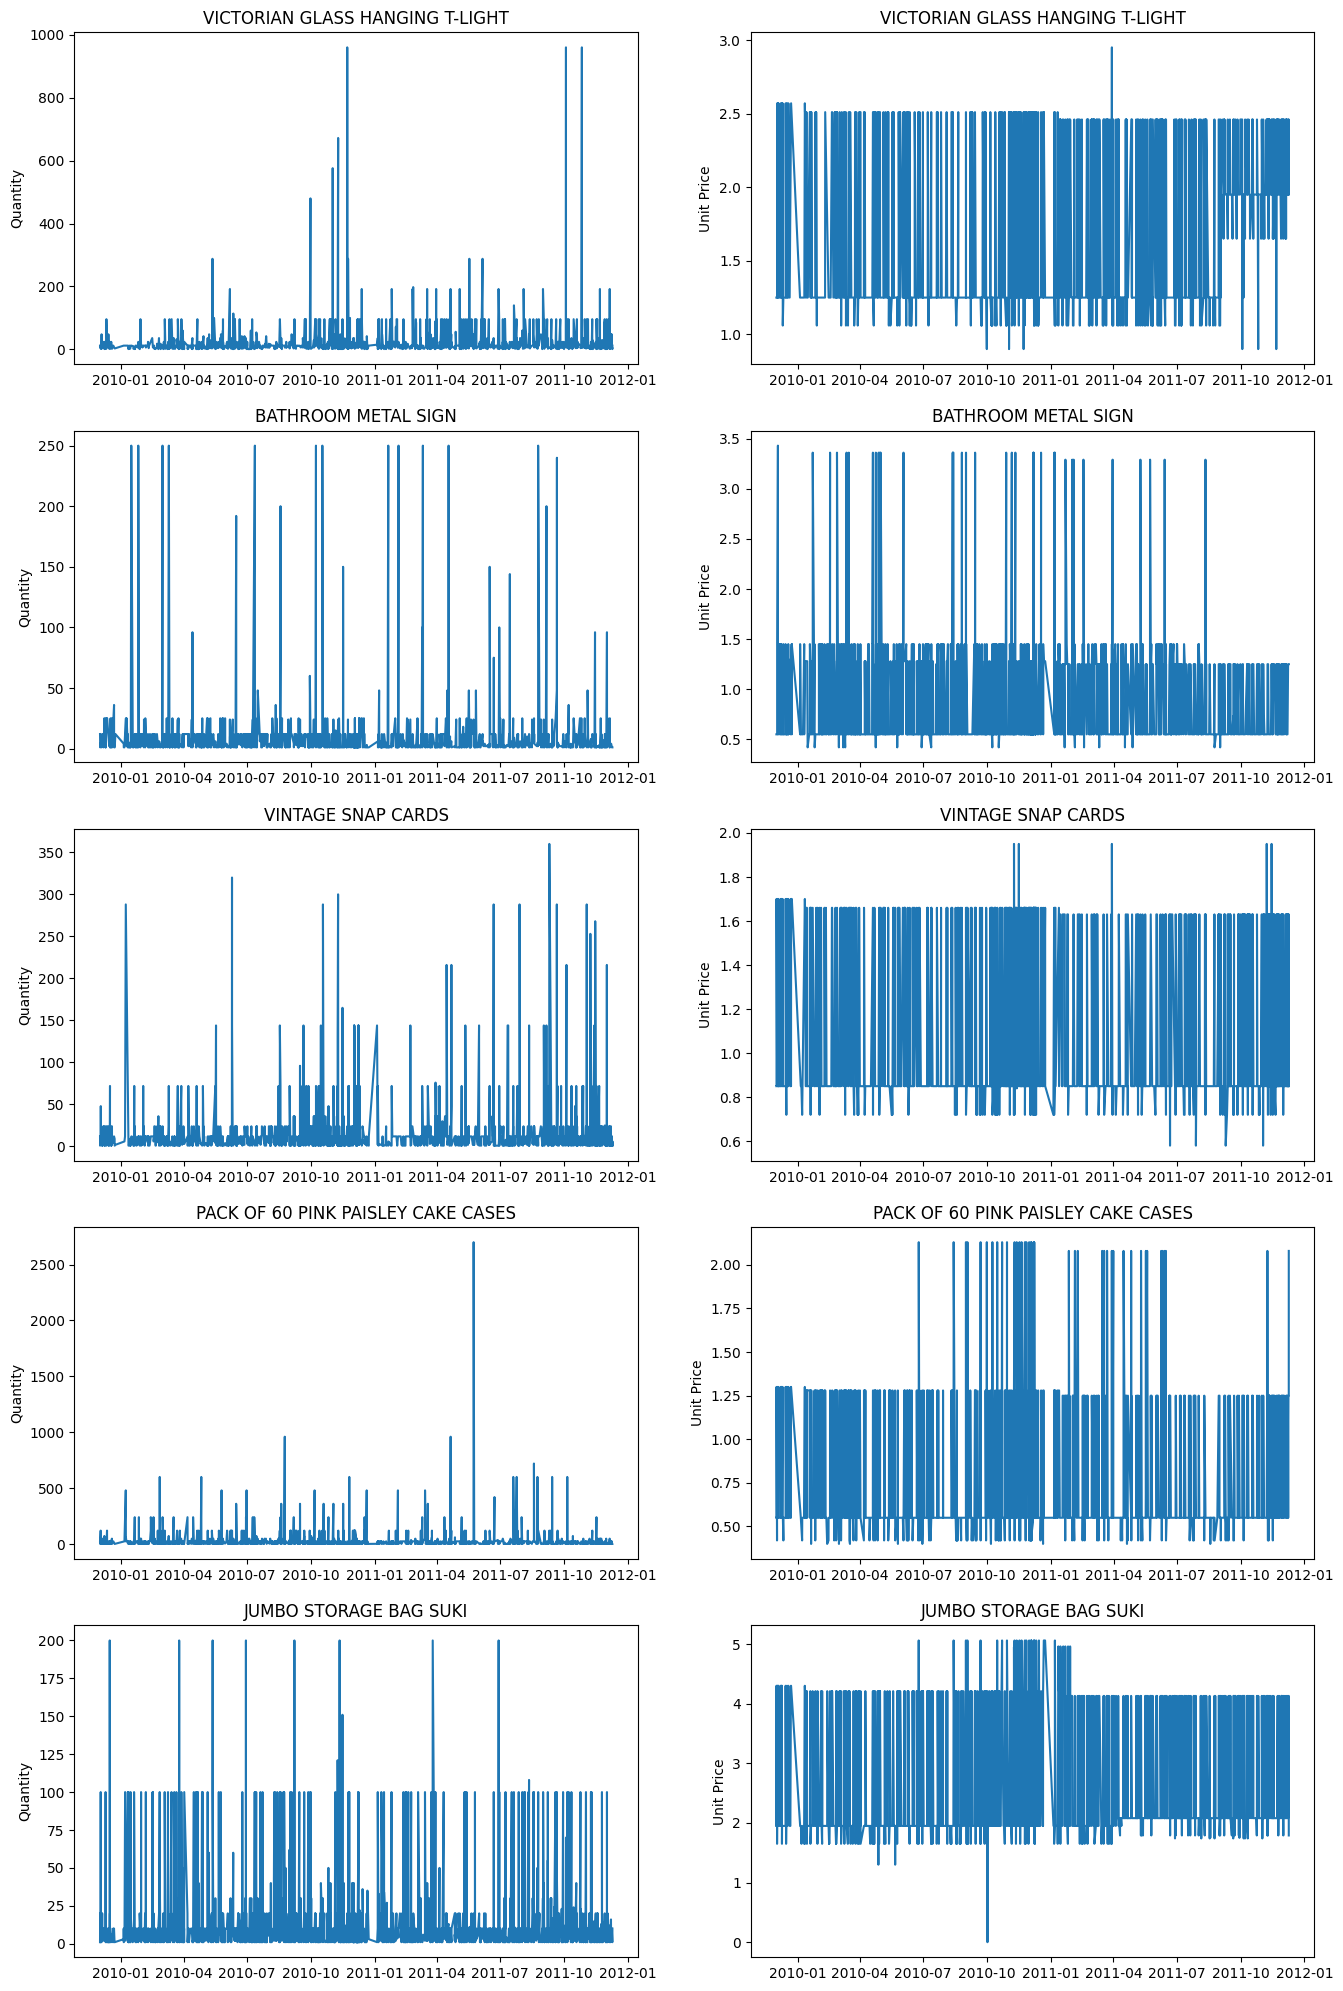

In [71]:
data_plot_df = data.drop(["Invoice", "StockCode", "Customer ID", "Country"], axis=1)
data_plot_df = data_plot_df[data_plot_df["Description"].isin(chosen_products)]
data_plot_df.rename(columns={"Description": "unique_id", "InvoiceDate": "ds", "Quantity": "y", "Price": "unit_price"}, inplace=True)

plt.figure(figsize=(16,25))

for i in range(0, 10, 2):
    plt.subplot(5, 2, i+1)
    plot_df = data_plot_df[data_plot_df["unique_id"] == chosen_products[i//2]]
    plt.plot(plot_df["ds"], plot_df["y"])
    plt.title(chosen_products[i//2])
    plt.ylabel("Quantity")
    plt.subplot(5, 2, i+2)
    plt.plot(plot_df["ds"], plot_df["unit_price"])
    plt.title(chosen_products[i//2])
    plt.ylabel("Unit Price")

plt.show()